<a href="https://colab.research.google.com/github/jusebas93martinez/GEOCOL2004/blob/main/Ondulaci%C3%B3nGeCol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# El código proporcionado realiza el cálculo de la ondulación geoidal del Geocol2004, utilizando coordenadas geográficas. La ondulación geoidal representa las variaciones en la altura de la superficie terrestre con respecto a un elipsoide de referencia.

El programa toma como entrada las coordenadas geográficas de latitud y longitud en grados, minutos y segundos. Luego, utiliza estos valores para realizar una interpolación y calcular la ondulación geoidal correspondiente a esas coordenadas.

In [1]:
# @title Cálculo de la ondulación geoidal

import numpy as np
from ipywidgets import interactive
import ipywidgets as widgets
from google.colab import drive
from google.colab import output
import gdown
import io
import requests


enlace_compartido = "https://drive.google.com/file/d/1j2Vey8zp1dGaTtSxhPSoXnzMqN432Zqu/view?usp=sharing"

archivo_id = enlace_compartido.split("/")[-2]

enlace_descarga = f"https://drive.google.com/uc?id={archivo_id}&export=download"


contenido = requests.get(enlace_descarga).content

data = np.loadtxt(io.BytesIO(contenido))

filas, columnas = data.shape

def calcular_interpolacion(latitud_deg, latitud_min, latitud_sec, longitud_deg, longitud_min, longitud_sec):
    latitud = latitud_deg + latitud_min/60 + latitud_sec/3600
    longitud = longitud_deg + longitud_min/60 + longitud_sec/3600
    longitud = longitud*-1

    latitud_superior_izquierda = 14.983333
    longitud_superior_izquierda = -79.983333
    resolucion = 0.03333333333333333

    # Cálculo de los índices de los puntos más cercanos
    fila = int((latitud_superior_izquierda - latitud) / resolucion)
    columna = int((longitud - longitud_superior_izquierda) / resolucion)

    lat1 = latitud_superior_izquierda - fila * resolucion
    lon1 = longitud_superior_izquierda + columna * resolucion
    lat2 = lat1 - resolucion
    lon2 = lon1 + resolucion

    val1 = data[fila, columna]
    val2 = data[fila, columna + 1]
    val3 = data[fila + 1, columna]
    val4 = data[fila + 1, columna + 1]

    interp_lat = ((latitud - lat1) / (lat2 - lat1)) * (val3 - val1) + val1
    interp_lat2 = ((latitud - lat1) / (lat2 - lat1)) * (val4 - val2) + val2
    interp_lon = ((longitud - lon1) / (lon2 - lon1)) * (interp_lat2 - interp_lat) + interp_lat

    return interp_lon

output_result = widgets.Label()

def handle_submit(sender):
    latitud_deg = float(latitud_deg_input.value)
    latitud_min = float(latitud_min_input.value)
    latitud_sec = float(latitud_sec_input.value)
    longitud_deg = float(longitud_deg_input.value)
    longitud_min = float(longitud_min_input.value)
    longitud_sec = float(longitud_sec_input.value)

    latitud_decimal = latitud_deg + latitud_min/60 + latitud_sec/3600
    longitud_decimal = longitud_deg + longitud_min/60 + longitud_sec/3600


    if not (-5 <= latitud_deg <= 15) or not (66 <= longitud_deg <= 80):
        output_result.value = "Error: Las coordenadas están fuera del rango válido."
    else:
   
        resultado_interpolacion = calcular_interpolacion(latitud_deg, latitud_min, latitud_sec, longitud_deg, longitud_min, longitud_sec)
   
        coordenadas_value.value = f"Coordenadas: Latitud={latitud_decimal}, Longitud={longitud_decimal*-1}"
     
        ondulacion_value.value = f"La ondulación es: {resultado_interpolacion}"

latitud_deg_input = widgets.FloatText(description='Latitud (g):')
latitud_min_input = widgets.FloatText(description='(min):')
latitud_sec_input = widgets.FloatText(description='(seg):')
longitud_deg_input = widgets.FloatText(description='Longitud (g):')
longitud_min_input = widgets.FloatText(description='(min):')
longitud_sec_input = widgets.FloatText(description='(seg):')
submit_button = widgets.Button(description='Calcular')
coordenadas_value = widgets.Label()
ondulacion_value = widgets.Label()

submit_button.on_click(handle_submit)

input_widgets = widgets.VBox([
latitud_deg_input,
latitud_min_input,
latitud_sec_input,
longitud_deg_input,
longitud_min_input,
longitud_sec_input
])

output_widgets = widgets.VBox([
coordenadas_value,
ondulacion_value,
output_result
])

display(input_widgets, submit_button, output_widgets)

Button(description='Calcular', style=ButtonStyle())

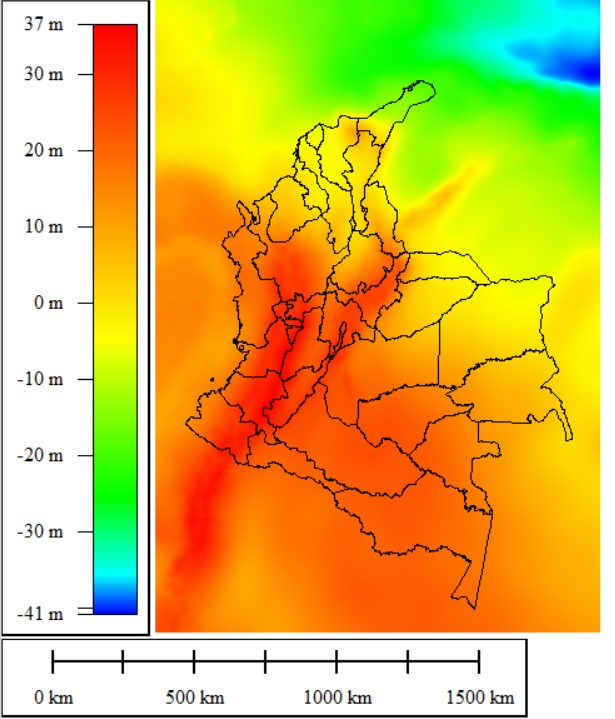